## Проектная работа: Принятие решений в бизнесе

Заказчик: Отдел маркетинга крупного интернет-магазина

Задачи: Приоритизация гипотез, проведение A/B теста и анализ результатов

## Изучаем датафреймы

In [318]:
#Импортируем нужные нам библиотеки для работы над проектом
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [319]:
#убираем ограничение на ширину и количество столбцов
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.3f}'.format

In [320]:
hypothesis, orders, visitors = (
pd.read_csv('/datasets/hypothesis.csv'),
pd.read_csv('/datasets/orders.csv'),
pd.read_csv('/datasets/visitors.csv'))
sns.set(rc={'figure.figsize':(14, 8)})

In [321]:
hypothesis.info()
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [322]:
orders.info()
orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [323]:
visitors.info()
visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Пропусков в таблице нет, но стоблцы date в датафреймах orders и visitors имеют тип object и привёдем название стоблцов в датафрейме hypothesis к нижнему регистру, выполним предобработку данных

### Предобработка данных

In [324]:
hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = [name.replace('Id', '_id') for name in orders.columns]

display(hypothesis.columns)
orders.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [325]:
visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

## Приоритизация гипотез

### ICE

In [326]:
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
print(hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False).head(5))

                                                                                                     hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   

     ice  
8 16.200  
0 13.333  
7 11.200  
6  8.000  
2  7.000  


По методике ICE мы нашли 5 гипотез, которым следует уделить внимание, далее применим метод RICE

### RICE

In [327]:
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
print(hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False).head(5))

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   

     rice  
7 112.000  
2  56.000  
0  40.000  
6  40.000  
8  16.200  


Разница приоритизации в том, что один метод учитывает количество пользователей, а другой нет, но топ-5 гипотез совпал

## Анализ A/B теста

### Строим график кумулятивной выручки по группам

In [328]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


#### Проверил пользователей

In [329]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [330]:
check_orders = orders.groupby('visitor_id').agg({'group' : 'nunique'}).query('group>1').count()
print(check_orders)

group    58
dtype: int64


In [333]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


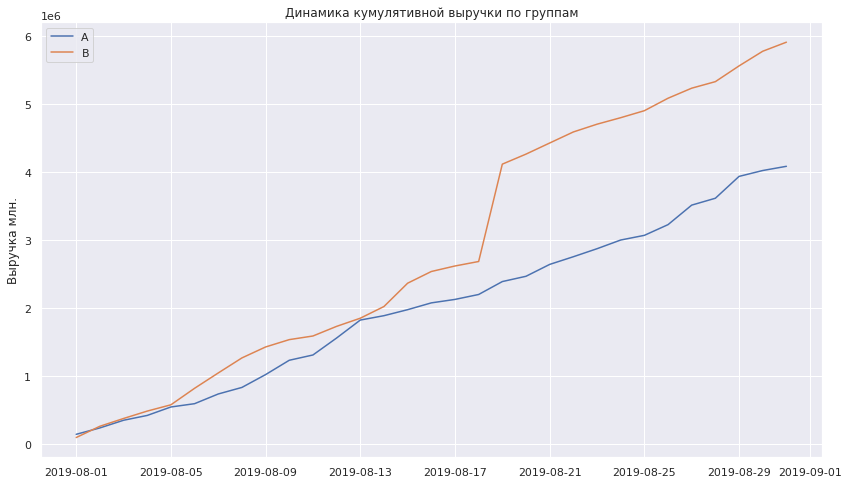

In [334]:
dates_grouped = orders[['date', 'group']].drop_duplicates()

orders_aggregate = dates_grouped.apply(
lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group']==x['group'])]
.agg({'date':'max', 'group':'max', 'transaction_id':'nunique', 'visitor_id':'nunique', 'revenue':'sum'}), axis=1)\
.sort_values(by=['date', 'group'])

visitors_aggregate = dates_grouped.apply(
lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
.agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1)\
.sort_values(by=['date', 'group'])

cumulative_data = orders_aggregate.merge(visitors_aggregate, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
print(cumulative_data.head())

cumulative_group_a = cumulative_data[cumulative_data['group']=='A'][['date', 'revenue', 'orders']]
cumulative_group_b = cumulative_data[cumulative_data['group']=='B'][['date', 'revenue', 'orders']]

plt.plot(cumulative_group_a['date'], cumulative_group_a['revenue'], label='A')
plt.plot(cumulative_group_b['date'], cumulative_group_b['revenue'], label='B')
plt.title('Динамика кумулятивной выручки по группам')
plt.ylabel('Выручка млн.')
plt.legend()
plt.show()

С построением графика мы выявили аномальный скачок группы B 18 августа 2019 года и благодаря этому закрепилось лидерство за этой группой до конца теста.

Есть предположение что аномально большие заказы влияют на результаты.

### График кумулятивного среднего чека по группам

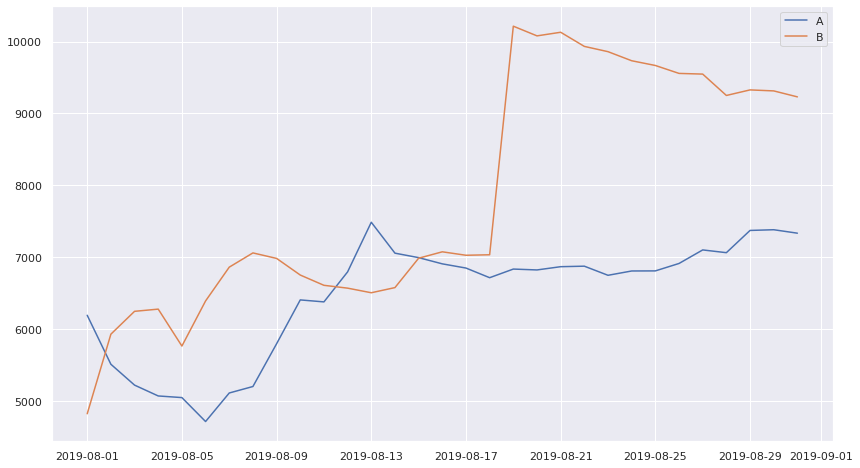

In [335]:
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date', 'revenue', 'orders']]
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date', 'revenue', 'orders']]

plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.legend()
plt.show()

Кумулятивное значение среднего чека продолжает колебаться, но с другой стороны, группа B в конце теста лидирует, продолжаем

### Изменения среднего чека группы B к группе A

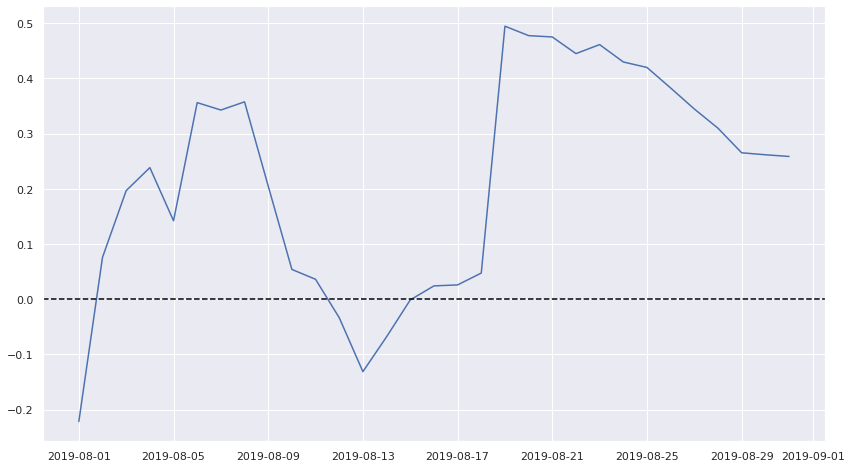

In [336]:
merged_cumulative_revenue = cumulative_revenue_a.merge(
cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(merged_cumulative_revenue['date'],
(merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/
(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Результаты теста значительно и резко изменились с 18 августа 19 года, видимо именно тогда были совершены аномальные заказы, которые повлияли на итог теста

### Конверсия по группам

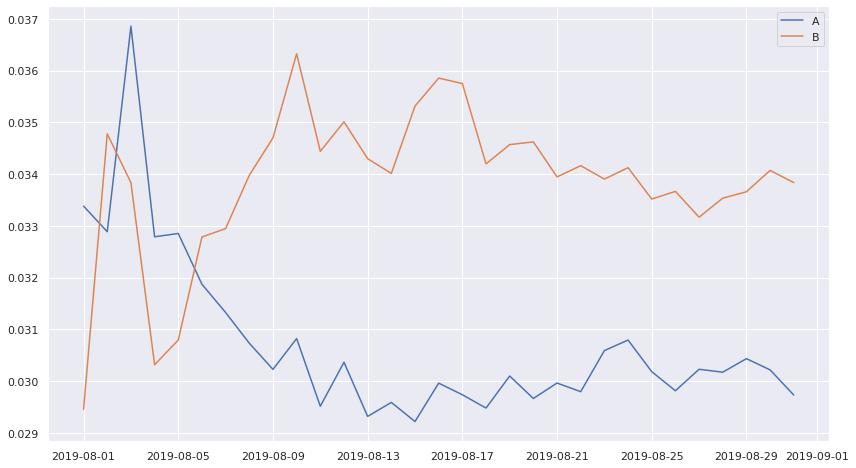

In [337]:
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']
cumulative_group_a = cumulative_data[cumulative_data['group']=='A']
cumulative_group_b = cumulative_data[cumulative_data['group']=='B']

plt.plot(cumulative_group_a['date'], cumulative_group_a['conversion'], label='A')
plt.plot(cumulative_group_b['date'], cumulative_group_b['conversion'], label='B')
plt.legend()
plt.show()

По конверсии видно, что результаты группы B значительно лучше.

Так же можно отметить колебания в начале конверсии, которые в последствии выровнялись.

### Относительное изменение конверсии группы B к группе A

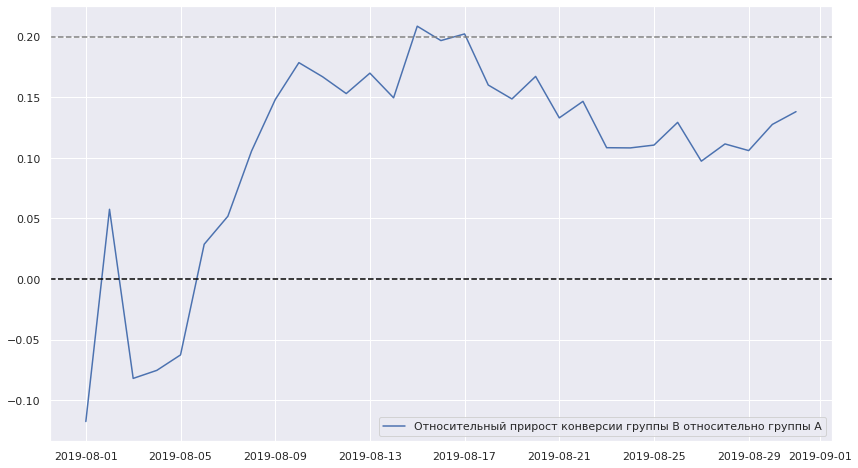

In [338]:
merged_cumulative_conversion = cumulative_group_a[['date', 'conversion']].merge(cumulative_group_b[['date', 'conversion']],\
left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(merged_cumulative_conversion['date'],
merged_cumulative_conversion['conversionB']/merged_cumulative_conversion['conversionA']-1,
        label='Относительный прирост конверсии группы B относительно группы A')
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.show()

Почти с самого начала теста группа B лидирует по конверсии, 15 августа был пик конверсии, но в конце теста зафиксировался около 150% ? (я очень сомневаюсь, правильно ли прочитал график)

Но ранее мы фиксировали аномальные выбросы, после еще раз проанализируем данные после очистки от выбросов.

### График количества заказов по пользователям

      visitors_id  orders
1023   4256040402      11
591    2458001652      11
569    2378935119       9
487    2038680547       8
44      199603092       5
744    3062433592       5
55      237748145       5
917    3803269165       5
299    1230306981       5
897    3717692402       5


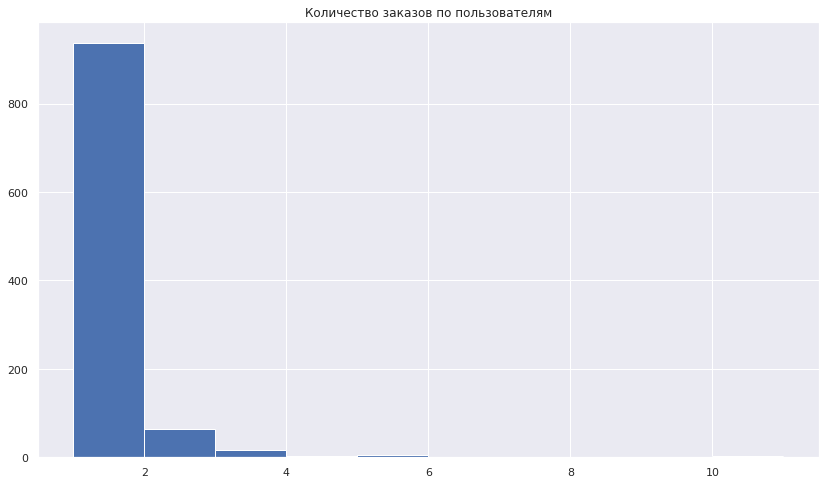

In [339]:
orders_by_users = (
orders.groupby('visitor_id', as_index=False)
.agg({'transaction_id':'nunique'}))
orders_by_users.columns = ['visitors_id', 'orders']
print(orders_by_users.sort_values(by='orders', ascending=False).head(10))

orders_by_users.columns=['user_id', 'orders']
plt.hist(orders_by_users['orders'])
plt.title('Количество заказов по пользователям')
plt.show()

Как мы видим, большинство пользователей сделали 1 заказ, но есть и те, кто сделал 11 заказов за месяц, возможно эти заказы искажают наш анализ

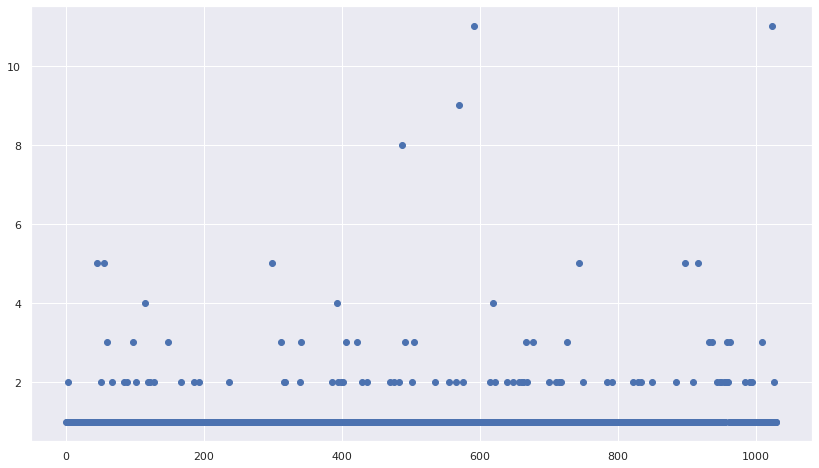

In [340]:
x_values = pd.Series(range(0, len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders'])
plt.show()

Пользователей заказавших более двух раз мало, возможно они могут быть аномальными. 

Далее нам надо понять, 2 заказа это нормально или много ?

### Считаем 95-й и 99-й перцентили количества заказов

In [341]:
print(np.percentile(orders_by_users['orders'], [95, 99]))

[2. 4.]


Не более 2 заказа сделали 5% пользователей.

Не более 4 заказов сделал 1% пользователей.

Установим верхнюю границу - 4 заказа.

### График стоимостей заказов

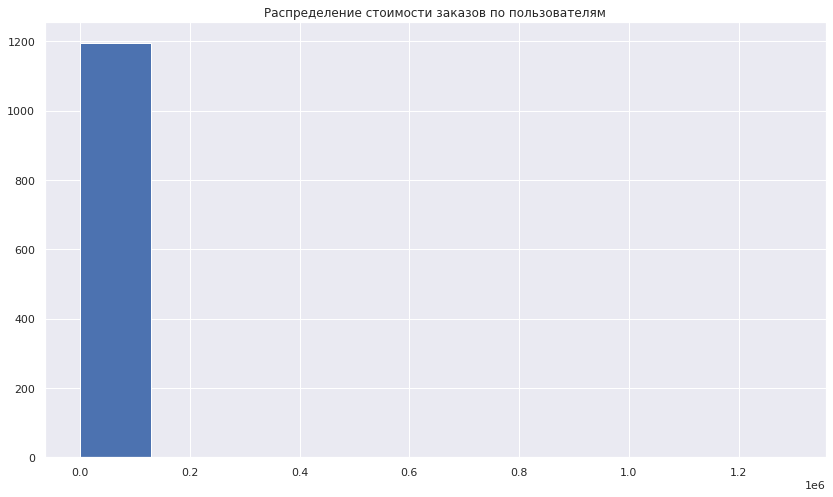

In [342]:
plt.hist(orders['revenue'])
plt.title('Распределение стоимости заказов по пользователям')
plt.show()

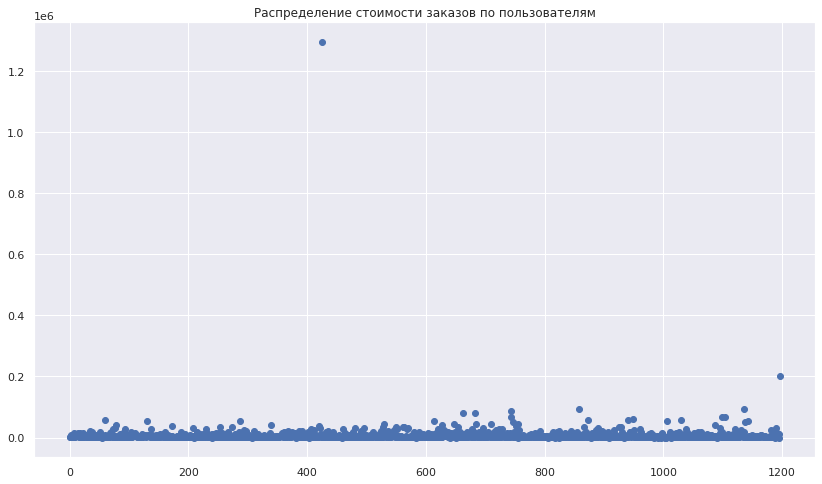

In [343]:
y_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(y_values, orders['revenue'])
plt.title('Распределение стоимости заказов по пользователям')
plt.show()

Один из заказов стоит почти 1.3 миллиона, он же и вызвал всплеск на графиках кумулятивных метрик и другие дорогие заказы так же могли повлиять на них

### 95-й и 99-й перцентили стоимости заказов

In [344]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


По перцентилю верхней границей стоимости заказов будет 58233

### Считаем статистическую значимость

In [345]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [346]:
visitors_a_daily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_p_day_a']

visitors_a_cummulative = visitors_a_daily.apply(
lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg({'date':'max', 'visitors_p_day_a':'sum'}), axis=1)

visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

visitors_b_daily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_p_day_b']

visitors_b_cummulative = visitors_b_daily.apply(
lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg({'date':'max', 'visitors_p_day_b':'sum'}), axis=1)

visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

orders_a_daily = (
orders[orders['group']=='A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
.groupby('date', as_index=False)
.agg({'transaction_id':pd.Series.nunique, 'revenue':'sum'}))
orders_a_daily.columns= ['date', 'orders_pdate_a', 'revenue_pdate_a']

orders_a_cummulative = orders_a_daily.apply(
lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
{'date':'max', 'orders_pdate_a':'sum', 'revenue_pdate_a':'sum'}), axis=1).sort_values(by=['date'])
orders_a_cummulative.columns = ['date', 'orders_cummulative_a', 'revenue_cummulative_a']

orders_b_daily = (
orders[orders['group']=='B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
.groupby('date', as_index=False)
.agg({'transaction_id':pd.Series.nunique, 'revenue':'sum'}))
orders_b_daily.columns= ['date', 'orders_pdate_b', 'revenue_pdate_b']

orders_b_cummulative = orders_b_daily.apply(
lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
{'date':'max', 'orders_pdate_b':'sum', 'revenue_pdate_b':'sum'}), axis=1).sort_values(by=['date'])
orders_b_cummulative.columns = ['date', 'orders_cummulative_b', 'revenue_cummulative_b']

data = (
orders_a_daily.merge(orders_b_daily, left_on='date', right_on='date', how='left')
.merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
.merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
.merge(visitors_a_daily, left_on='date', right_on='date', how='left')
.merge(visitors_b_daily, left_on='date', right_on='date', how='left')
.merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
.merge(visitors_b_cummulative, left_on='date', right_on='date', how='left'))

Мы составили таблицу:

    Data - дата

    orders_pdate_a - количество заказов в выбранную дату группы А

    revenue_pdate_a - сумма заказов в выбранную дату группы А

    orders_pdate_b - количество заказов в выбранную дату группы B

    revenue_pdate_b - сумма заказов в выбранную дату группы B

    orders_cummulative_a  - суммарное число заказов до выбранной даты в группе А

    revenue_cummulative_a  - суммарная выручка до выбранной даты в группе А

    orders_cummulative_b  - суммарное число заказов до выбранной даты в группе В

    revenue_cummulative_b  - суммарная выручка до выбранной даты в группе В

    visitors_p_day_a - количество-пользователей в выбранную дату группы А

    visitors_p_day_b - количество-пользователей в выбранную дату группы В

    visitors_cummulative_a  - количество пользователей до выбранной даты группы А

    visitors_cummulative_b  - количество пользователей до выбранной даты группы В

Найдём пользователей которые заказывали хотя бы 1 раз

In [347]:
orders_by_users_a = (
orders[orders['group']=='A']
.groupby('visitor_id', as_index=False)
.agg({'transaction_id':pd.Series.nunique}))
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
orders[orders['group']=='B']
.groupby('visitor_id', as_index=False)
.agg({'transaction_id':pd.Series.nunique}))
orders_by_users_b.columns = ['visitor_id', 'orders']

Добавим еще 2 переменные: sample_a и sample_b, в которых пользователям из разных групп будут соответствовать кол-во заказов

In [348]:
sample_a = pd.concat([orders_by_users_a['orders'], pd.Series(0, index=np.arange(data['visitors_p_day_a'].sum()\
- len(orders_by_users_a['orders'])), name='orders')], axis=0)

sample_b = pd.concat([orders_by_users_b['orders'], pd.Series(0, index=np.arange(data['visitors_p_day_b'].sum()\
- len(orders_by_users_b['orders'])), name='orders')], axis=0)

### Применим критерий Манна-Уитни и посчитаем прирост группы B к группе A

Нулевая и альтернативная гипотеза будет такой:

    H0: нет различий в конверсии между группами
    H1: есть различия в конверсии между группами
    
Уровень значимости = 0.05

In [349]:
alpha = 0.05
p_value = stats.mannwhitneyu(sample_a, sample_b)[1]
print('p_value:' ,'{0:.3f}'.format(p_value))
print('Относительный прирост:', '{0:.3f}'.format(sample_b.mean()/sample_a.mean()-1))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу, разница между группами есть')
else:
    print('Не получилось отвергнуть нулевую гипотезу, разницы между группами нет')

p_value: 0.017
Относительный прирост: 0.138
Отвергаем нулевую гипотезу, разница между группами есть


p-value = 0.017, меньше 0.05, значит нулевую гипотезу о том что статистически значимых различий в среднем числе заказов между группами нет, отвергаем.

Прирост группы B к группе A составил 13.8%

### Применим критерий Манна-Уитни с сырыми данными по среднему чеку

Гипотеза по "сырым" данным:

    H0: нет различий в среднем чеке заказа между группами
    H1: различия в среднем чеке заказа между группами есть
    
Уровень значимости = 0.05 

In [350]:
p_value = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print('{0:.3f}'.format(p_value))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
if p_value < alpha:
    print('Отвергаем нулевую гипотезу, разница между группами есть')
else:
    print('Не получилось отвергнуть нулевую гипотезу, разницы между группами нет')

0.729
0.259
Не получилось отвергнуть нулевую гипотезу, разницы между группами нет


p-value 0.729 больше 0.05, не получилось отвергнуть нулевую гипотезу, разницы по среднем чеку между группами нет.

### Подготавливаем данные к очищению от аномалий данных

In [351]:
big_orders = np.percentile(orders_by_users['orders'], 99)
big_revenue = np.percentile(orders['revenue'], 99)

users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > big_orders]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > big_orders]['visitor_id'],
    ],
    axis=0,)

users_with_expensive_orders = orders[orders['revenue'] > big_revenue]['visitor_id']
abnormal_users = pd.concat(
    [users_with_many_orders, users_with_expensive_orders], axis=0).drop_duplicates().sort_values()
print(len(abnormal_users))

15


Нашли 15 аномальных пользователей

Посмотрим как их действия повлияли на результаты теста

### Работаем с очищенными данными

Нулевая и альтернативная гипотеза с очищенными данными будет такой:

    H0: нет различий в конверсии между группами
    H1: есть различия в конверсии между группами 
    
Уровень значимости = 0.05

In [352]:
sample_a_filtered = pd.concat(
[
    orders_by_users_a[
        np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
    ]['orders'],
    pd.Series(0, index=np.arange(
    data['visitors_p_day_a'].sum() - len(orders_by_users_a['orders'])
    ), name='orders',),
], axis=0)

sample_b_filtered = pd.concat(
[
    orders_by_users_b[
        np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
    ]['orders'],
    pd.Series(0, index=np.arange(
    data['visitors_p_day_b'].sum() - len(orders_by_users_b['orders'])
    ), name='orders',),
], axis=0)

p_value = stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]
print('{0:.5f}'.format(p_value))
print('{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу, разница между группами есть')
else:
    print('Не получилось отвергнуть нулевую гипотезу, разницы между группами нет')

0.01438
0.153
Отвергаем нулевую гипотезу, разница между группами есть


p-value: 0.014, меньше .05

Отвергаем нулевую гипотезу: между группами есть разница, прирост группы B к группе A равен 15.3%

### Статистическая значимость в среднем чеке заказа, очищенные данные

Нулевая и альтернативная гипотеза с очищенными данными по среднему чеку будет такой:

    H0: нет различий в среднем чеке заказа между группами
    H1: различия в среднем чеке заказа между группами есть 
    
Уровень значимости = 0.05

In [353]:
print('p_value:'
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p_value:0.851
-0.006


p-value 0.851 больше 0.05, значит причин отвергать нулевую гипотезу нет, различий в среднем чеке тоже нет.

## Рекомендации (вывод)

1 часть: Приоритизация гипотез:

Следует обратить внимание на такие гипотезы:

    Запустить акцию, дающую скидку на товар в день рождения

    Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   

    Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

Если гипотезы должны включать охват пользователей интернет-магазина, то следует присмотреться к другому порядку гипотез:

    Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

    Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   

    Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
    
2 часть: A/B тест:

    Рекомендую остановить тест, т.к. группа B имеет конверсию намного выше чем конверсия группы A

    Нет статистически значимого различия в средних чеках между группами по "сырым" и по фильтрованным данным